In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

4423680/4422102 [==============================] - 49s 11us/step


In [8]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

print(test_images.shape)
print(len(test_labels))

print(np.unique(test_labels))
print(train_images[0])

#print(np.unique(train_images[0]))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000
[0 1 2 3 4 5 6 7 8 9]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 1

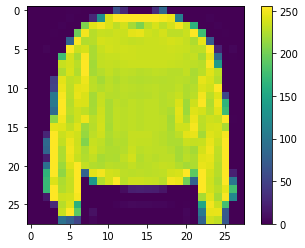

In [10]:
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(False)
plt.show()

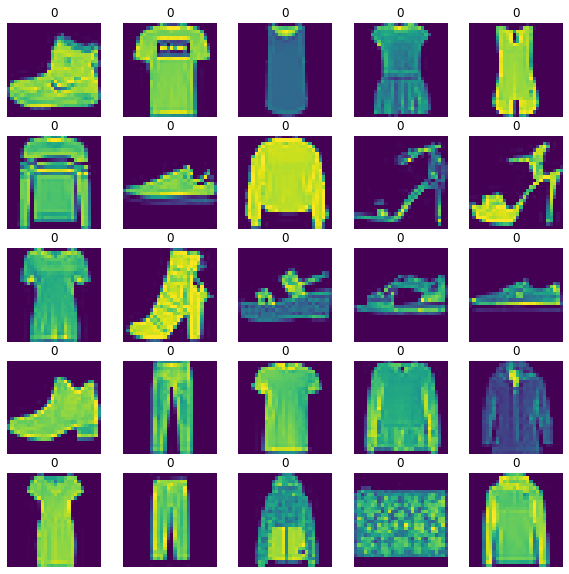

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    x=np.reshape(train_images[i,:],[28,28])
    plt.subplot(5,5,i+1)
    plt.imshow(x)
    plt.title(str(np.argmax(train_labels[i])))
    plt.axis('off')

In [21]:
train_images=train_images/255.0
test_images=test_images/255.0
class_names=['T-shirt','Trouser','pullover','dress','coat','sandal','shirt',
            'sneaker','bag','ankel_boot']

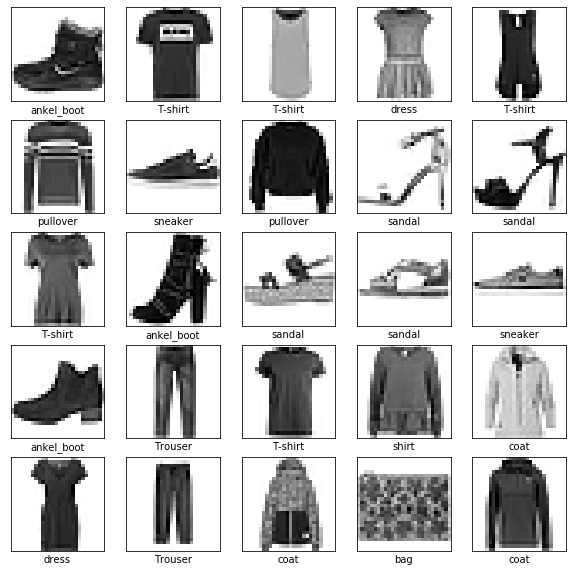

In [24]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [26]:
#build model
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [27]:
#model summary
print(model.summary())   
#128*10+10   dense 3 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
# compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [29]:
# train the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 23s 386us/sample - loss: 0.4932 - acc: 0.8263
Epoch 2/5
60000/60000 [==============================] - 20s 332us/sample - loss: 0.3717 - acc: 0.8642 - loss: 0.3722 - acc: 
Epoch 3/5
60000/60000 [==============================] - 19s 312us/sample - loss: 0.3345 - acc: 0.8777 - l
Epoch 4/5
60000/60000 [==============================] - 21s 356us/sample - loss: 0.3116 - acc: 0.8852 - loss - ETA: 7s - l - ETA: 6s - loss: 0.3097 - acc: 0. - ETA: 6s - l - ETA: 4s - loss: 0 - ETA: 3s
Epoch 5/5
60000/60000 [==============================] - 21s 345us/sample - loss: 0.2938 - acc: 0.8917 - loss: 0.2943 - acc - ETA: 6s - loss: 0.294 - ETA: 3s - loss: 0.2943 - acc:  - ETA: 3s - loss: 0 - ETA: 2


In [30]:
#evaluate the accuracy
test_loss, test_acc=model.evaluate(test_images, test_labels)
print('test accuracy: ',test_acc)

10000/10000 [==============================] - 2s 229us/sample - loss: 0.3530 - acc: 0.8734
test accuracy:  0.8734


In [34]:
# make prediction -------------<Batch method>
predictions= model.predict(test_images)
print(predictions[0])
print("predicted class ",np.argmax(predictions[0]))
print('True class',test_labels[0])

[7.2854973e-06 2.3702594e-07 1.1190646e-05 2.2142163e-07 1.4162121e-05
 1.9830316e-02 1.1652711e-05 8.7159827e-02 5.8524460e-05 8.9290655e-01]
predicted class  9
True class 9


In [36]:
# testing single image
img=test_images[0]
print(img.shape)
#add image to a batch where it is only member
img=(np.expand_dims(img,0))
print(img.shape)

pred_single=model.predict(img)
print(pred_single)

(28, 28)
(1, 28, 28)
[[7.2855169e-06 2.3702637e-07 1.1190656e-05 2.2142162e-07 1.4162119e-05
  1.9830318e-02 1.1652710e-05 8.7159902e-02 5.8524507e-05 8.9290649e-01]]
